In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core/')
sys.path.append('/kaggle/input/my-flagellar-library/')
import flg_support as fls
import flg_unet
import flg_numerics
import flg_model
import importlib
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
import flg_yolo

fast_mode = False
if fls.is_submission:
    fast_mode = False
importlib.reload(flg_model)
importlib.reload(fls)

MainProcess
MainProcess


<module 'flg_support' from 'd:\\flagellar/code/core\\flg_support.py'>

In [2]:
data = fls.dill_load(fls.result_dir + '/many_full_res/Baseline_0M_c36e9856_524 _f.pickle')
ref_data = data.test_data

In [3]:
def show_cv(data, ref_data):
    main_cv = fls.score_competition_metric(data,ref_data)
    alt_cv = []
    for partial in fls.DataSelector().datasets:
        data_selector = fls.DataSelector()
        data_selector.datasets = [partial]
        alt_cv.append(fls.score_competition_metric(data_selector.select(data), data_selector.select(ref_data)))
    for ii in range(3):
        print(f'{main_cv[ii]:1.3} {alt_cv[0][ii]:1.3} {alt_cv[1][ii]:1.3} {alt_cv[2][ii]:1.3} {alt_cv[3][ii]:1.3}')

In [4]:
show_cv(data.inferred_test_data, ref_data)

0.883 0.768 1.0 1.0 1.0
0.477 1.0 0.6 0.387 0.275
0.525 0.943 0.652 0.441 0.321


In [5]:
# inds = np.arange(len(ref_data))
# np.random.default_rng(seed=0).shuffle(inds)
# inds = inds[:150]
# new_inferred = []
# new_ref = []
# for i in inds:
#     new_inferred.append(data.inferred_test_data[i])
#     new_ref.append(ref_data[i])
# show_cv(new_inferred, new_ref)
# data.trained_model.data_after_step2 = []
# data.trained_model.state = 1
# re_inferred = data.trained_model.infer(new_ref)
# print('')
# show_cv(re_inferred, new_ref)

In [6]:
data.trained_model.step3Output.threshold=0.
data.trained_model.data_after_step2 = []
for d in data.inferred_test_data:
    data.trained_model.data_after_step2.append(d)

In [7]:
data_reinferred = data.trained_model.infer(data.test_data)
show_cv(data_reinferred, ref_data)

0
350
0.814 0.562 1.0 1.0 1.0
0.713 1.0 0.75 0.707 0.585
0.731 0.865 0.789 0.751 0.637


In [8]:
data.trained_model.ratio_of_motors_allowed = 0.75
data.trained_model.step3Output.select_on_ratio = False
data_reinferred = data.trained_model.infer(data.test_data)
show_cv(data_reinferred, ref_data)

88
350
0.81 0.589 1.0 1.0 1.0
0.623 1.0 0.75 0.667 0.415
0.653 0.877 0.789 0.714 0.47


In [9]:
data.trained_model.ratio_of_motors_allowed = 0.75
data.trained_model.step3Output.select_on_ratio = True
data_reinferred = data.trained_model.infer(data.test_data)
show_cv(data_reinferred, ref_data)

88
350
0.87 0.678 1.0 1.0 1.0
0.647 0.968 0.75 0.587 0.521
0.682 0.892 0.789 0.64 0.576


0
350
Number of true positives before filter:  244  out of  300


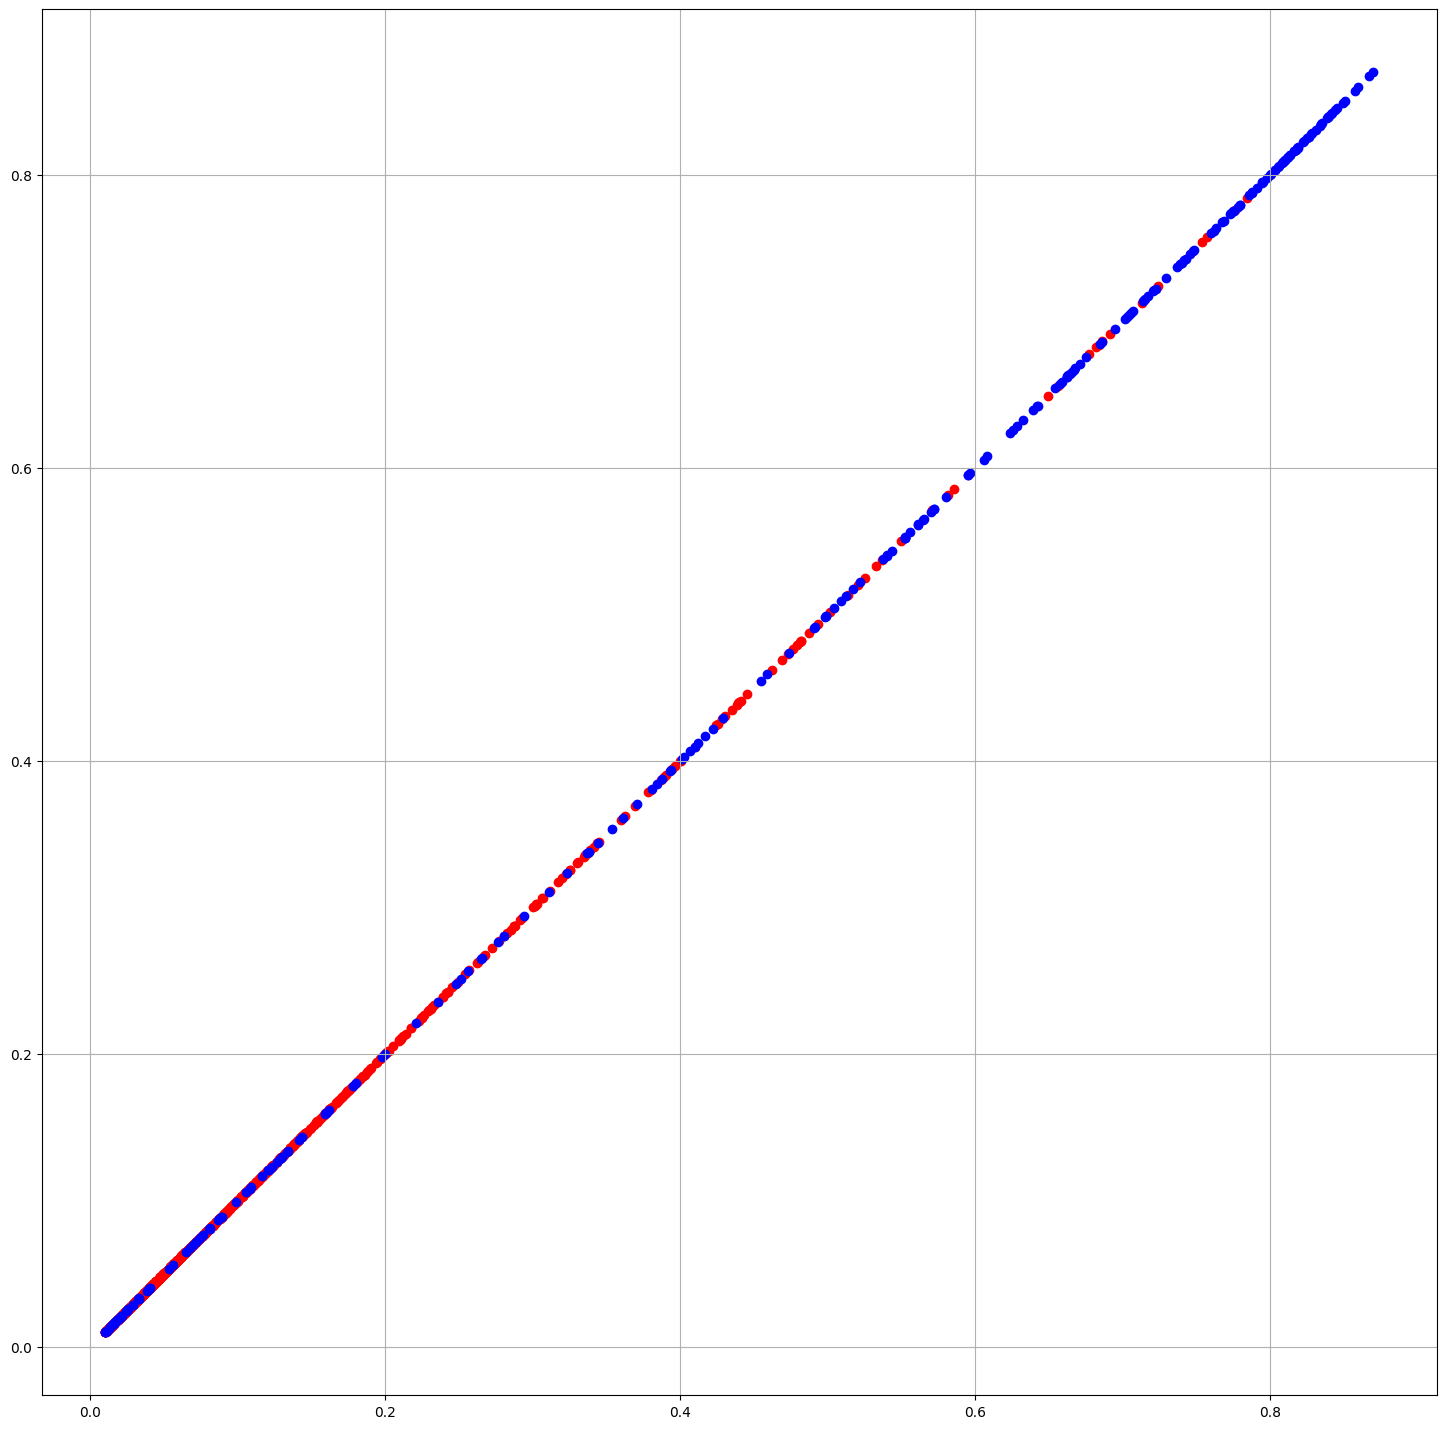

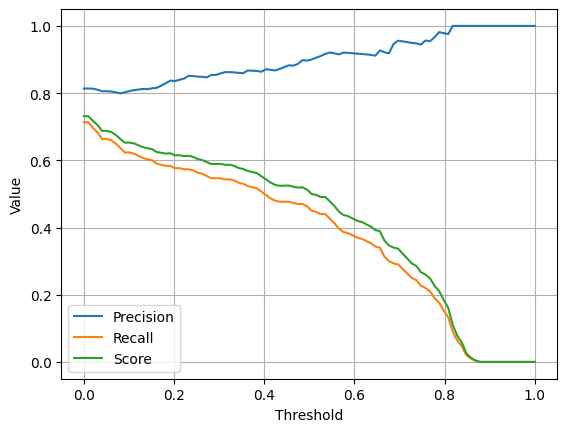

In [10]:
importlib.reload(flg_model)
data.trained_model.state = 0
data.trained_model.calibrate_step_3 = True
data.trained_model.step3Output.select_on_ratio = False
data.trained_model.ratio_of_motors_allowed = 1.
mod = copy.deepcopy(data.trained_model)
mod.train_data_selector.datasets = ['tom', 'ycw', 'aba', 'mba']
mod.train(data.test_data, data.test_data)

0
350
Number of true positives before filter:  244  out of  300


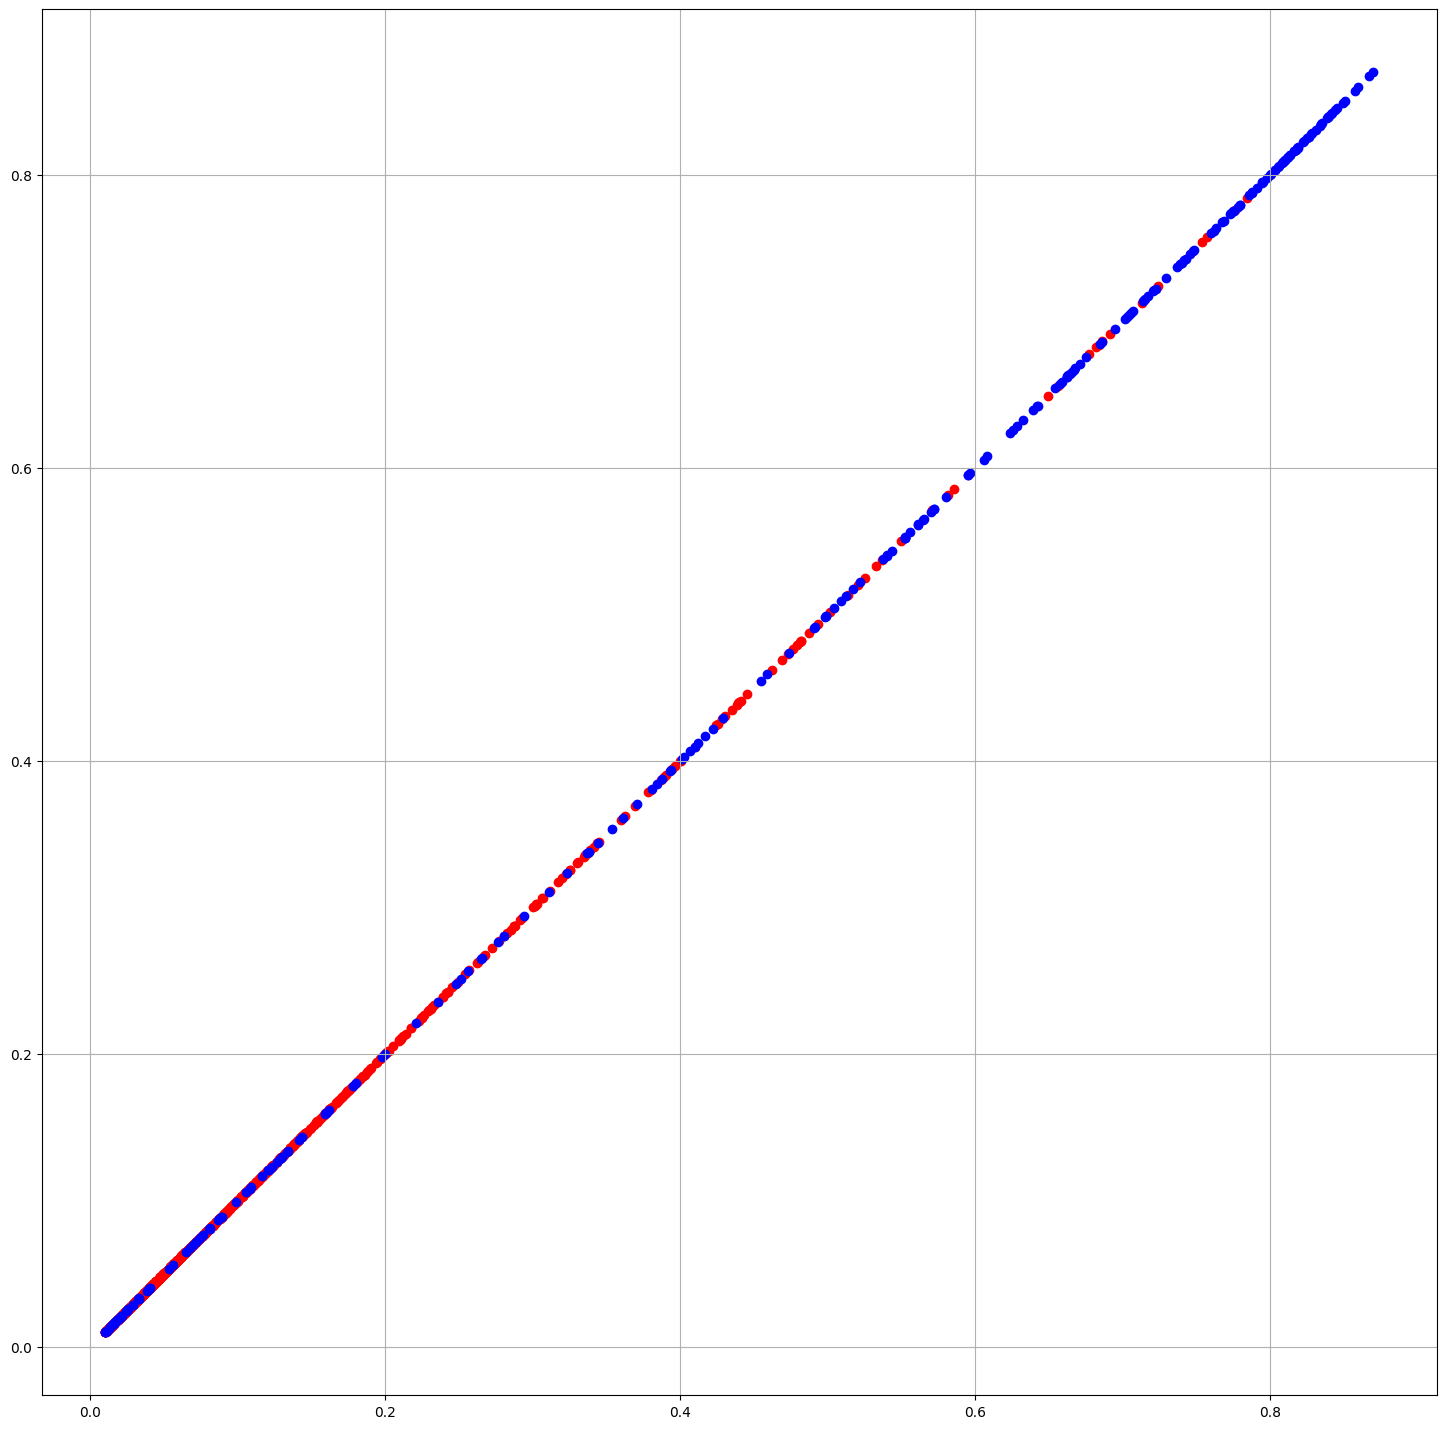

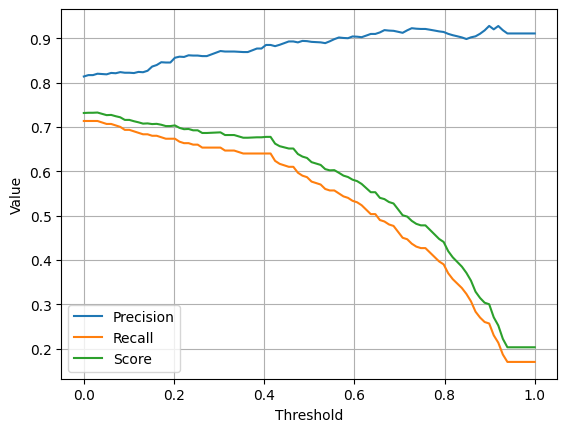

In [11]:
importlib.reload(flg_model)
data.trained_model.state = 0
data.trained_model.step3Output.select_on_ratio=True
data.trained_model.calibrate_step_3 = True
mod2 = copy.deepcopy(data.trained_model)
mod2.train_data_selector.datasets = ['tom', 'ycw', 'aba', 'mba']
mod2.train(data.test_data, data.test_data)

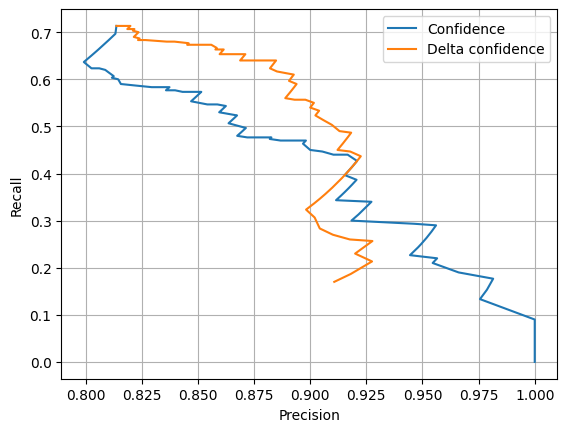

In [12]:
plt.figure()
plt.plot(mod.step3Output.precisions, mod.step3Output.recalls)
plt.plot(mod2.step3Output.precisions, mod2.step3Output.recalls)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid(True)
plt.legend(['Confidence', 'Delta confidence'])